In [13]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

c = np.array([-3, -4], dtype=np.float64)
G = np.array([[1,4], [2,3], [2,1]], dtype=np.float64)
h = np.array([1700, 1400, 1000], dtype=np.float64)

sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688583


In [5]:
import cvxopt

P = cvxopt.matrix(np.array([[2,1], [1,2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2,4], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[ 1.57009246e-16]
 [-2.00000000e+00]]
-4.0


In [7]:
A = cvxopt.matrix(np.array([[1,1]], dtype=np.float64))
b = cvxopt.matrix(np.array([0], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[ 1.]
 [-1.]]
-1.0000000000000013


In [9]:
G = cvxopt.matrix(np.array([[2,3]], dtype=np.float64))
h = cvxopt.matrix(np.array([3], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[[-2.45940165e-09]
 [-2.00000001e+00]]
-4.0


In [14]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha*grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


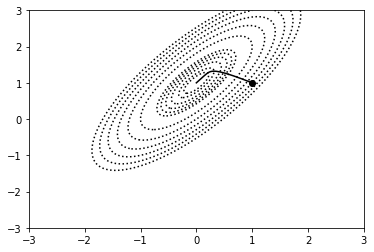

In [16]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5* x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10*x - 6*y + 6, -6*x + 6*y - 6])

algo = GradientDescent(f, df)
initial = np.array([1,1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:,0], algo.path_[:,1], color="k", linewidth=1.5)
xs = np.linspace(-3, 3, 300)
ys = np.linspace(-3, 3, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3,-2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels = levels, colors="k", linestyles = "dotted")

plt.show()

/home/toritakashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/home/toritakashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/home/toritakashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


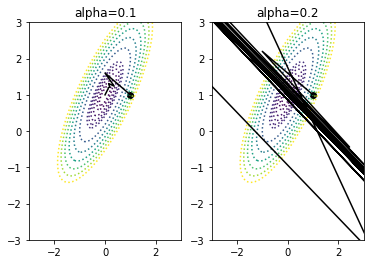

In [29]:
algos = []
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)

fig, ax = plt.subplots(1, 2)

for i in range(2):
    ax[i].set_xlim((-3, 3))
    ax[i].set_ylim((-3, 3))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:,0], algos[i].path_[:, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, color="k", linestyles="dotted")
    
plt.show()

In [31]:
def newton1dim(f, df, x0, eps=1e-10, max_iter = 1000):
    x = x0
    iter = 0
    while True:
        x_new = x -f(x)/df(x)
        if abs(x-x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new

def f(x):
    return x**3 -5*x + 1

def df(x):
    return 3*x**2-5

print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))

2.1284190638445777
0.20163967572340463
-2.330058739567982


In [41]:
from numpy import linalg

class Newton:
    
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
        
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x-x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
            return x_new

[1.  0.5]
[-1.  -0.5]
[-1.  -2.5]


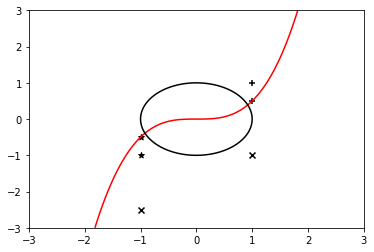

In [42]:
def f1(x, y):
    return x**3-2*y

def f2(x, y):
    return x**2+y**2-1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x,y), f2(x,y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 300)
y = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="r", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = Newton(f, df)

initials = [np.array([1,1]),np.array([-1,-1]), np.array([1, -1])]
markers = ["+", "*", "x"]

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:,0], solver.path_[:,1], color="k", marker=m)
    print(sol)
    
plt.show()